# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


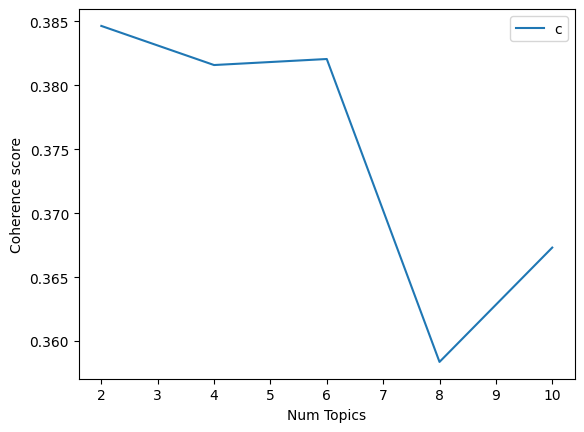

[0.38464703807035117, 0.38158825682323616, 0.3820594042115636, 0.3583690174604934, 0.3673111312771685]
0.38464703807035117
2
[(0, '0.081*"brocolli" + 0.081*"good" + 0.059*"brother"'), (1, '0.072*"drive" + 0.043*"pressur" + 0.043*"health"')]


In [5]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
texts = []

for i in doc_s:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)

limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=y, id2word = dictionary, passes=20)

print(ldamodel.print_topics(num_topics=y, num_words=3))

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


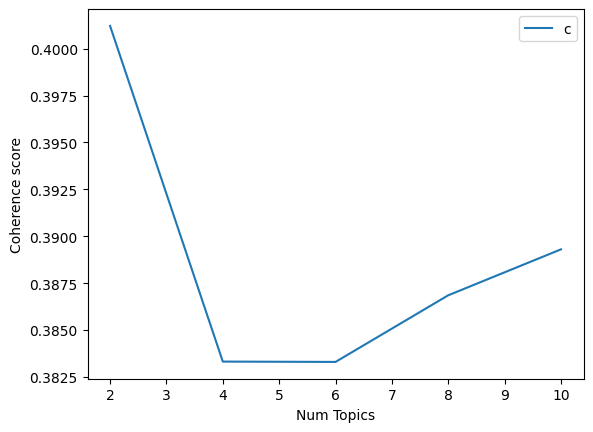

[0.40121314402881153, 0.38331817556394937, 0.3833003013147106, 0.38685277468639534, 0.38930188465401]
0.40121314402881153
2
[(0, '0.424*"brocolli" + 0.424*"good" + 0.350*"eat"'), (1, '0.376*"drive" + -0.349*"good" + -0.349*"brocolli"')]


In [6]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords

nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
texts = []
for i in doc_s:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)


import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)


lsamodel = gensim.models.lsimodel.LsiModel(corpus, num_topics=y, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=y, num_words=3))

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [7]:
# Install gensim
!pip install gensim

# Import necessary libraries
import numpy as np
import pandas as pd
import gensim
import nltk
nltk.download('punkt')
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your text data (replace with your own dataset)
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]

# Preprocess the text data
stop_words = set(stopwords.words("english"))
texts = [[word for word in word_tokenize(doc.lower()) if word.isalpha() and word not in stop_words] for doc in doc_s]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print top words for each topic
for topic_num, topic_words in lda_model.print_topics():
    print(f"Topic {topic_num}: {topic_words}")

# Summarize the topics based on top words
topic_summaries = []
for topic_num, topic_words in lda_model.print_topics():
    top_words = [word.split("*")[1].strip() for word in topic_words.split("+")]
    topic_summary = f"Topic {topic_num}: {', '.join(top_words)}"
    topic_summaries.append(topic_summary)

print("\nTopic Summaries:")
print("\n".join(topic_summaries))


Topic 0: 0.030*"good" + 0.030*"health" + 0.030*"brother" + 0.030*"brocolli" + 0.030*"driving" + 0.030*"mother" + 0.030*"eat" + 0.030*"pressure" + 0.030*"cause" + 0.030*"professionals"
Topic 1: 0.030*"health" + 0.030*"brocolli" + 0.030*"good" + 0.030*"brother" + 0.030*"driving" + 0.030*"mother" + 0.030*"eat" + 0.030*"feel" + 0.030*"professionals" + 0.030*"pressure"
Topic 2: 0.083*"pressure" + 0.083*"may" + 0.083*"increased" + 0.083*"blood" + 0.083*"suggest" + 0.083*"tension" + 0.083*"driving" + 0.083*"experts" + 0.083*"cause" + 0.083*"health"
Topic 3: 0.030*"health" + 0.030*"good" + 0.030*"brocolli" + 0.030*"brother" + 0.030*"eat" + 0.030*"driving" + 0.030*"mother" + 0.030*"cause" + 0.030*"pressure" + 0.030*"say"
Topic 4: 0.030*"good" + 0.030*"health" + 0.030*"brocolli" + 0.030*"brother" + 0.030*"driving" + 0.030*"mother" + 0.030*"eat" + 0.030*"cause" + 0.030*"professionals" + 0.030*"say"
Topic 5: 0.089*"mother" + 0.089*"brother" + 0.089*"practice" + 0.089*"time" + 0.089*"spends" + 0.08

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [8]:
# Install gensim (if not already installed)
!pip install gensim

# Import necessary libraries
import numpy as np
import pandas as pd
import gensim
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your text data (replace with your own dataset)
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]

# Preprocess the text data
stop_words = set(stopwords.words("english"))
texts = [[word for word in word_tokenize(doc.lower()) if word.isalpha() and word not in stop_words] for doc in doc_s]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print top words for each topic
for topic_num, topic_words in lda_model.print_topics():
    print(f"Topic {topic_num}: {topic_words}")

# Summarize the topics based on top words
topic_summaries = []
for topic_num, topic_words in lda_model.print_topics():
    top_words = [word.split("*")[1].strip() for word in topic_words.split("+")]
    topic_summary = f"Topic {topic_num}: {', '.join(top_words)}"
    topic_summaries.append(topic_summary)

print("\nTopic Summaries:")
print("\n".join(topic_summaries))

Topic 0: 0.226*"health" + 0.118*"say" + 0.118*"professionals" + 0.118*"good" + 0.118*"brocolli" + 0.011*"mother" + 0.011*"driving" + 0.011*"brother" + 0.011*"eat" + 0.011*"time"
Topic 1: 0.072*"feel" + 0.072*"perform" + 0.072*"well" + 0.072*"seems" + 0.072*"school" + 0.072*"better" + 0.072*"drive" + 0.072*"often" + 0.072*"never" + 0.072*"pressure"
Topic 2: 0.030*"brocolli" + 0.030*"good" + 0.030*"health" + 0.030*"mother" + 0.030*"brother" + 0.030*"driving" + 0.030*"eat" + 0.030*"professionals" + 0.030*"pressure" + 0.030*"drive"
Topic 3: 0.030*"brocolli" + 0.030*"brother" + 0.030*"mother" + 0.030*"health" + 0.030*"driving" + 0.030*"good" + 0.030*"professionals" + 0.030*"pressure" + 0.030*"say" + 0.030*"eat"
Topic 4: 0.171*"brocolli" + 0.171*"good" + 0.171*"eat" + 0.089*"brother" + 0.089*"mother" + 0.089*"likes" + 0.008*"driving" + 0.008*"health" + 0.008*"professionals" + 0.008*"pressure"
Topic 5: 0.089*"mother" + 0.089*"brother" + 0.089*"driving" + 0.089*"baseball" + 0.089*"lot" + 0.089

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [9]:
# Write your code here
'''
I believe the LDA model gives greater accuracy than the LSA model based on the models.
Due to the LSA model's inability to comprehendaccurately conveying a word's several meanings.
For instance, the word "drive" has many connotations in the data utilized in the aforementioned statistics.
One is driving a car, and the other is pushing. In the LSA model, its meaning has not been adequately explained.
Driving well and brocolli don't go together very well. While the LDA model has performed better than the LSA model at interpreting meanings.
Therefore, compared to LSA model, the topics suggested by LDA model make more sense

'''

'\nI believe the LDA model gives greater accuracy than the LSA model based on the models.\nDue to the LSA model\'s inability to comprehendaccurately conveying a word\'s several meanings.\nFor instance, the word "drive" has many connotations in the data utilized in the aforementioned statistics.\nOne is driving a car, and the other is pushing. In the LSA model, its meaning has not been adequately explained.\nDriving well and brocolli don\'t go together very well. While the LDA model has performed better than the LSA model at interpreting meanings.\nTherefore, compared to LSA model, the topics suggested by LDA model make more sense\n\n'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [10]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
It was a wonderful learning experience to work on the assignments using topic modeling algorithms and text data.
Comprehending algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic
facilitated the understanding of the subtleties involved in feature extraction from textual material.
Optimizing the many algorithms parameters to get the best outcomes, especially in terms of coherence scores and topic interpretability was the issue I faced.

'''

'\nIt was a wonderful learning experience to work on the assignments using topic modeling algorithms and text data.\nComprehending algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic\nfacilitated the understanding of the subtleties involved in feature extraction from textual material.\nOptimizing the many algorithms parameters to get the best outcomes, especially in terms of coherence scores and topic interpretability was the issue I faced.\n\n'